In [2]:
# IPython magig  tools
%load_ext autoreload
%autoreload 2

from aind_vr_foraging_analysis.utils.parsing import data_access
import aind_vr_foraging_analysis.data_io as data_io
import os
import seaborn as sns

# Plotting libraries
import pandas as pd
import warnings
pd.options.mode.chained_assignment = None  # Ignore SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
import matplotlib.pyplot as plt

foraging_figures = r'C:\Users\tiffany.ona\OneDrive - Allen Institute\Documents'

In [ ]:
date_string = "2024-4-1"
mouse_list = ['754570','754579','754567','754580','754559','754560','754577',
              '754566','754571','754572','754573','754574','754575', 
              '754582','745302','745305','745301',
              
              "715866", "713578", "707349", "716455", 
              "716458","715865","715869","713545","715867",
              "715870","694569", 
              
              '754574', '789914', '789915', '789923', '789917', 
               '789913', '789909', '789910', '789911', '789921', 
               '789918', '789919', '789907', '789903', '789925', 
               '789924', '789926', '789908',
               
               '798279', '807093', '807086', '815102', '828421', '828422', '810761', '811026', 
               '828420', '804430', '804434', '806527', '828417', '828418', '808729', '815104', 
               '815103', '795556', '795133', '811021', '810750', '828423', '828425'] 

experiment_list = { 1: 'pilot',
                    2 : 'volume_manipulation',
                   3: 'global_reward_rate_patches', 
                   4: 'global_reward_rate_distance_friction',
                   5 : 'learning_reversals', 
                   6: "stops"}

In [13]:
results = []

for mouse in mouse_list:
    print(f"Loading {mouse}...")

    session_paths = data_access.find_sessions_relative_to_date(
        mouse=mouse,
        date_string=date_string,
        when='on_or_after',
    )

    # Determine batch based on mouse number
    mouse_int = int(mouse)
    if mouse_int > 800000: 
        batch = 6
    elif mouse == 754574 and date_string >= "2025-4-1":
        batch = 5
    elif mouse_int > 780000:
        batch = 5
    elif mouse_int > 740000:
        batch = 4
    elif mouse_int > 700000:
        batch = 3
    elif mouse_int > 690000:
        batch = 2
    else:
        batch = 1
    session_n = 0
    for session_path in session_paths:
        try:
            all_epochs, stream_data, data = data_access.load_session(session_path)
            reward_sum = all_epochs.loc[all_epochs['is_reward'] == 1, 'reward_amount'].sum()

            results.append({
                'water': reward_sum,
                'length': all_epochs['length'].sum(),
                'mouse': mouse,
                'batch': batch,
                'session_n': session_n
            })
            session_n+=1

        except Exception as e:
            print(f"Error loading {session_path}: {e}")
            continue

# Final DataFrame
cum_df = pd.DataFrame(results)


Loading 789925...
No reward sites found
Error loading Z:\scratch\vr-foraging\data\789925\789925_2025-03-21T192721Z: 'is_reward'
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software events
Reward functions from software event

In [14]:
cum_df = pd.DataFrame(results)

In [15]:
test_df = cum_df.groupby(['mouse', 'session_n', 'batch']).length.sum().reset_index()

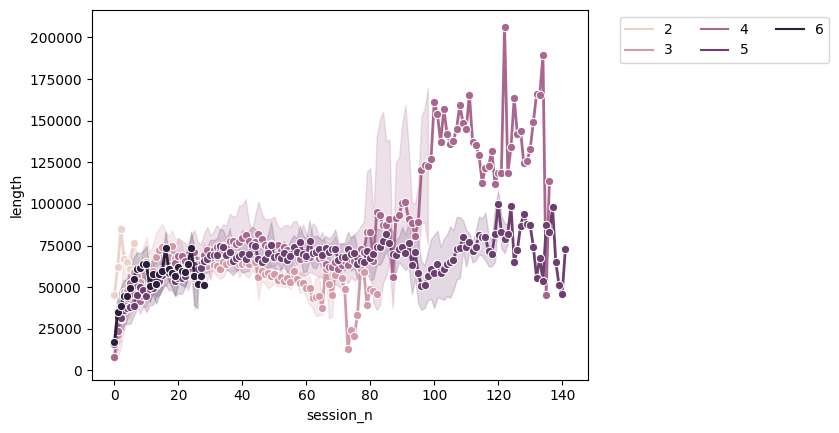

In [16]:
sns.lineplot(data=test_df, x='session_n', y='length', hue='batch',  marker='o', lw=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol = 3)

In [17]:
cum_df.to_csv(os.path.join(foraging_figures, f"water_{date_string}.csv"), index=False)

(0.0, 20.0)

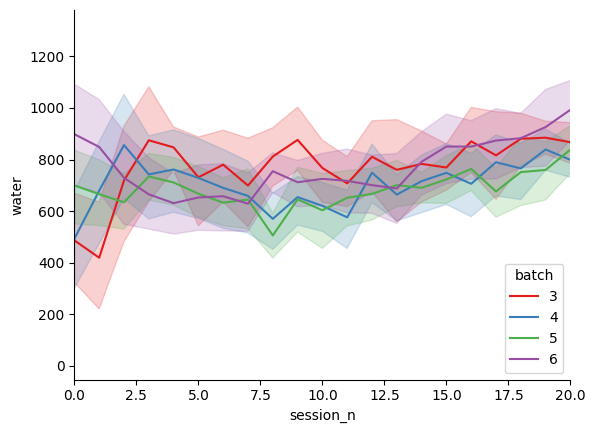

In [19]:
sns.lineplot(data=cum_df.loc[cum_df.batch!= 2], x='session_n', y='water', hue='batch', palette='Set1')
sns.despine()
plt.xlim(0,20)

In [26]:
trainer_dict = {'798279': 'Huy',
                '807093': 'Huy', 
                '807086': 'Huy',
                '815102': 'Huy',
                # '789903': 'Huy',
                # '789907': 'Huy',
                # '808728': 'Huy',
                # '808619': 'Huy',
                '828421': 'Huy',
                '828422': 'Huy',
                '810761': 'Huy',
                '811026': 'Huy',
                '828420': 'Huy',
                "804430" : 'Jason',
                "804434" : 'Jason',
                '806527': 'Huy',
                '828417': 'Huy',
                '828418': 'Huy',
                '808729': 'Alex',
                '815104': 'Tiffany',
                '815103': 'Tiffany',
                '795556': 'Tiffany',
                '795133': 'Tiffany',
                '811021': 'Alex',
                '810750': 'Alex',
                '828423': 'Tiffany',
                '828425': "Tiffany"
                }

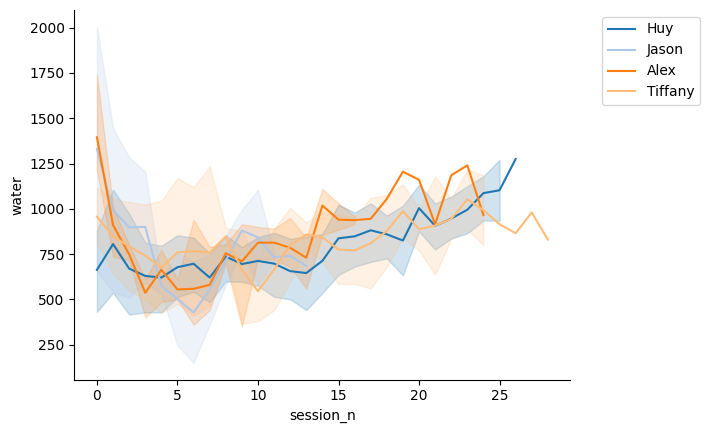

In [27]:
plot = cum_df.loc[cum_df.batch== 6].copy()
plot['trainer'] = plot.apply(lambda x: trainer_dict[x['mouse']], axis=1)

sns.lineplot(data=plot, x='session_n', y='water', hue='trainer', palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
sns.despine()